In [62]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data1.csv')
data

,Unnamed: 0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...,...
1090,2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
1091,2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
1092,2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
1093,2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


In [63]:
data1 = data.rename(columns={"Unnamed: 0": "Date"})
data2 = data1.set_index('Date')

In [68]:
data2
pd.to_datetime(data2.index)
data2.index = pd.to_datetime(data2.index)
data2

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
Date,,,,,,
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941


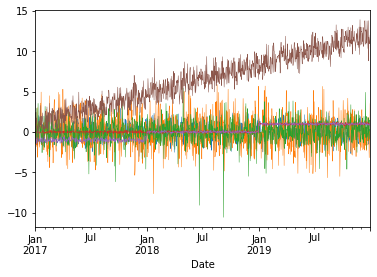

In [65]:
data2['theta_1'].plot(linewidth=0.5);
data2['theta_2'].plot(linewidth=0.5);
data2['theta_3'].plot(linewidth=0.5);
data2['theta_4'].plot(linewidth=0.5);
data2['theta_5'].plot(linewidth=0.5);
data2['theta_6'].plot(linewidth=0.5);

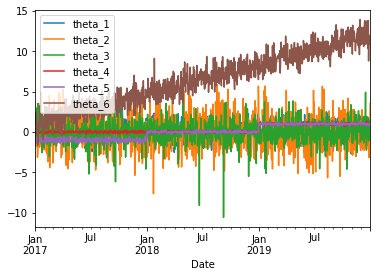

In [66]:
data2.plot()

In [73]:
melted = data2.melt()
melted

,variable,value
0,theta_1,0.756936
1,theta_1,0.767089
2,theta_1,0.404544
3,theta_1,1.313957
4,theta_1,0.209862
...,...,...
6565,theta_6,11.755980
6566,theta_6,11.397092
6567,theta_6,10.918941
6568,theta_6,11.140722


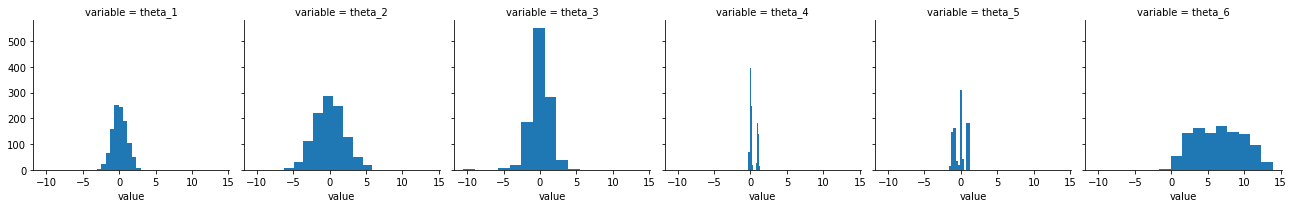

In [109]:
g = sns.FacetGrid(melted, col='variable')
g.map(plt.hist, 'value')

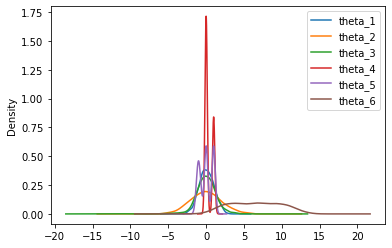

In [87]:
ax = data2.plot.kde()

In [117]:
start_date = pd.to_datetime("01-01-2018")
end_date = pd.to_datetime("31-12-2018 23:59:59")
start_date
end_date
pd.to_datetime(data1["Date"])
data1["Date"] = pd.to_datetime(data1["Date"])
mask = (data1['Date'] > start_date) & (data1['Date'] <= end_date)
mask
data_2k18 = data1.loc[mask]
data_2k18 = data_2k18.drop(columns=['theta_5','theta_6'])
data_2k18 = data_2k18.set_index("Date")
data_2k18

,theta_1,theta_2,theta_3,theta_4
Date,,,,
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025
2018-01-06,0.230512,-0.160794,-0.835972,-0.020499
...,...,...,...,...
2018-12-27,0.473556,-0.651265,-0.523058,0.076798
2018-12-28,1.433117,0.325632,0.905920,0.028891
2018-12-29,0.285428,-0.476290,1.082404,0.111482


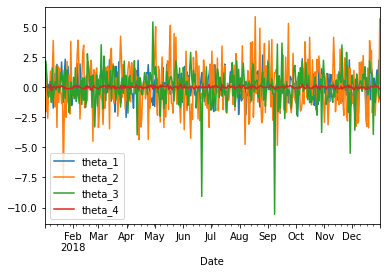

In [118]:
data_2k18.plot()

In [121]:
melted = data_2k18.melt()
melted

,variable,value
0,theta_1,-0.283107
1,theta_1,1.572221
2,theta_1,-1.042981
3,theta_1,-1.392614
4,theta_1,0.230512
...,...,...
1451,theta_4,0.076798
1452,theta_4,0.028891
1453,theta_4,0.111482
1454,theta_4,-0.080878


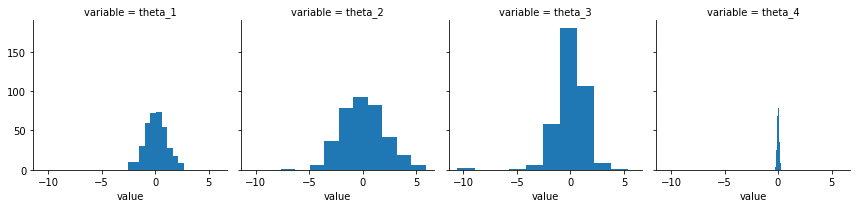

In [122]:
g = sns.FacetGrid(melted, col='variable')
g.map(plt.hist, 'value')

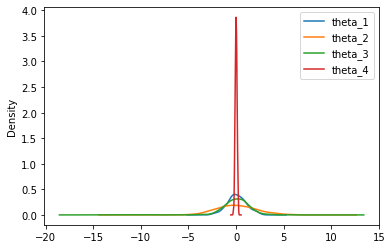

In [123]:
ax = data_2k18.plot.kde()